In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from skimage import measure

In [2]:
image = cv2.imread('data/images/test5.jpg')
print("Height: {},Width: {}".format(*image.shape[:2]))
# imger = plt.imread('data/images/test5.jpg')
# plt.imshow(imger)

Height: 499,Width: 750


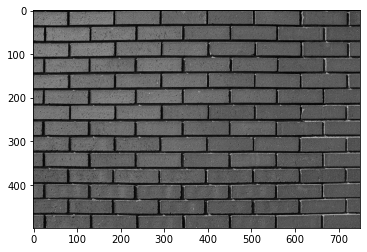

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

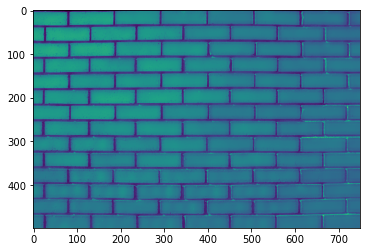

In [4]:
blurred = cv2.bilateralFilter(gray, 21, 41, 41)
plt.imshow(blurred)

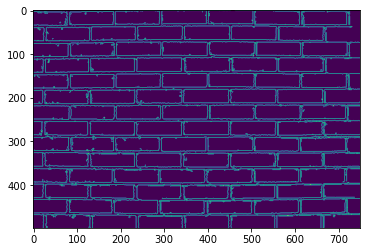

In [5]:
edged = cv2.Canny(blurred,50, 200, apertureSize=3)
plt.imshow(edged)

In [ ]:
minLineLength = 100
maxLineGap = 1
lines = cv2.HoughLinesP(edged,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

# plt.imshow(lines)
cv2.imwrite('houghlines5.jpg',image)

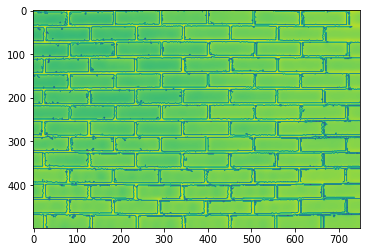

In [6]:
thresh = threshold_local(blurred, 21, offset=15).astype("uint8")*255
mask = cv2.bitwise_not(edged)
thresh = cv2.bitwise_and(thresh, thresh, mask=mask)
plt.imshow(thresh)

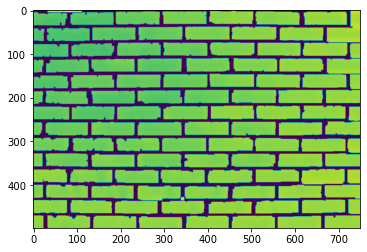

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(thresh)

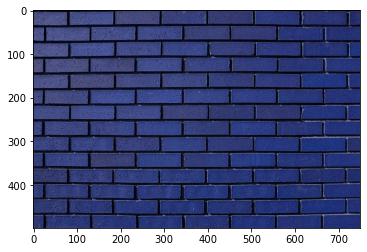

In [8]:
thresh_copy = thresh.copy()
(cnts, _) = cv2.findContours(thresh_copy, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

output = image.copy()
plt.imshow(output)

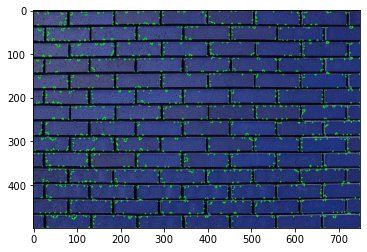

In [9]:
for c in cnts:
    cv2.drawContours(output, c, -1, (0, 255, 0), 2)
plt.imshow(output)

In [10]:
print("# of bricks:", len(cnts))
cv2.imshow("Bricks", output)
cv2.waitKey(0)

# of bricks: 112


32

In [11]:
num_labels, labels_im = cv2.connectedComponents(thresh, connectivity=8)
labels = measure.label(thresh, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

for (i, label) in enumerate(np.unique(labels_im)):
    if label == 0:
        continue

    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels_im == label] = 255
    numPixels = cv2.countNonZero(labelMask)

    mask = cv2.add(mask, labelMask)
    cv2.imshow("Mask", mask)
    cv2.waitKey(0)
print("# of bricks (accurate):", len(np.unique(labels_im)) - 1)

# of bricks (accurate): 112
